# Keras - Eksperiments

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_ytrevikna_single.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 33 columns):
YVIK-YtreVikna1-G17-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M17 G1.AVL           5237 non-null int64
DNMI_75410...........T0015A3-0120    5237 non-null float64
/arome_windvel_6481_1056             5190 non-null float64
DNMI_75220...........T0015A3-0120    5237 non-null float64
/arome_windvel_6482_1114             5190 non-null float64
DNMI_75550...........T0015A3-0120    5237 non-null float64
/arome_windvel_6520_1098             5190 non-null float64
STORM-YVik1-Vindhast-25km            5237 non-null float64
STORM-YVik1-Vindretn-25km            5237 non-null int64
/arome_windvel_6491_1087             5190 non-null float64
/arome_airtemp_6491_1087             5190 non-null float64
/arome_airtemp_6495_1081             5190 non-null float64
/arome_airpress_6495_1081            5190 non-null float64
/arome_winddir_6495_1081             5185 non-null float64
/arome_windv

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 5 to 5236
Data columns (total 33 columns):
YVIK-YtreVikna1-G17-T4015A3 -0104    5160 non-null float64
RRS.S2502.Gunit.M17 G1.AVL           5160 non-null int64
DNMI_75410...........T0015A3-0120    5160 non-null float64
/arome_windvel_6481_1056             5160 non-null float64
DNMI_75220...........T0015A3-0120    5160 non-null float64
/arome_windvel_6482_1114             5160 non-null float64
DNMI_75550...........T0015A3-0120    5160 non-null float64
/arome_windvel_6520_1098             5160 non-null float64
STORM-YVik1-Vindhast-25km            5160 non-null float64
STORM-YVik1-Vindretn-25km            5160 non-null int64
/arome_windvel_6491_1087             5160 non-null float64
/arome_airtemp_6491_1087             5160 non-null float64
/arome_airtemp_6495_1081             5160 non-null float64
/arome_airpress_6495_1081            5160 non-null float64
/arome_winddir_6495_1081             5160 non-null float64
/arome_windv

In [4]:
num_features = len(data.columns) -1
print(num_features)

32


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=32, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_simple_single.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3612 samples, validate on 1548 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 0.47171, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.6102 - val_loss: 0.4717
Epoch 2/10000
Epoch 00001: val_loss improved from 0.47171 to 0.29703, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.3649 - val_loss: 0.2970
Epoch 3/10000
Epoch 00002: val_loss improved from 0.29703 to 0.26852, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.2663 - val_loss: 0.2685
Epoch 4/10000
Epoch 00003: val_loss improved from 0.26852 to 0.23378, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.2338 - val_loss: 0.2338
Epoch 5/10000
Epoch 00004: val_loss improved from 0.23378 to 0.22393, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.2153 - val_loss: 0.2239
Epoch 6/10000
Epoch 00005: val_loss improved from 0.22393 to 0.21653, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.2087 - val_loss: 0.2165
Epoch 7/10000


Epoch 00072: val_loss did not improve
0s - loss: 0.1809 - val_loss: 0.1921
Epoch 74/10000
Epoch 00073: val_loss did not improve
0s - loss: 0.1780 - val_loss: 0.1947
Epoch 75/10000
Epoch 00074: val_loss did not improve
0s - loss: 0.1775 - val_loss: 0.1925
Epoch 76/10000
Epoch 00075: val_loss improved from 0.18921 to 0.18841, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1792 - val_loss: 0.1884
Epoch 77/10000
Epoch 00076: val_loss improved from 0.18841 to 0.18839, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1768 - val_loss: 0.1884
Epoch 78/10000
Epoch 00077: val_loss improved from 0.18839 to 0.18813, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1776 - val_loss: 0.1881
Epoch 79/10000
Epoch 00078: val_loss did not improve
0s - loss: 0.1767 - val_loss: 0.1886
Epoch 80/10000
Epoch 00079: val_loss improved from 0.18813 to 0.18811, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1773 - val_loss: 0.1881
Epoch 81/10000
Epoch 00

Epoch 00153: val_loss did not improve
0s - loss: 0.1715 - val_loss: 0.1856
Epoch 155/10000
Epoch 00154: val_loss did not improve
0s - loss: 0.1730 - val_loss: 0.1896
Epoch 156/10000
Epoch 00155: val_loss did not improve
0s - loss: 0.1769 - val_loss: 0.1855
Epoch 157/10000
Epoch 00156: val_loss did not improve
0s - loss: 0.1720 - val_loss: 0.1851
Epoch 158/10000
Epoch 00157: val_loss did not improve
0s - loss: 0.1727 - val_loss: 0.1903
Epoch 159/10000
Epoch 00158: val_loss did not improve
0s - loss: 0.1737 - val_loss: 0.1872
Epoch 160/10000
Epoch 00159: val_loss did not improve
0s - loss: 0.1711 - val_loss: 0.1863
Epoch 161/10000
Epoch 00160: val_loss did not improve
0s - loss: 0.1714 - val_loss: 0.1875
Epoch 162/10000
Epoch 00161: val_loss did not improve
0s - loss: 0.1740 - val_loss: 0.1848
Epoch 163/10000
Epoch 00162: val_loss did not improve
0s - loss: 0.1713 - val_loss: 0.1862
Epoch 164/10000
Epoch 00163: val_loss improved from 0.18443 to 0.18433, saving model to checkpoint_model_s

Epoch 00239: val_loss did not improve
0s - loss: 0.1699 - val_loss: 0.1830
Epoch 241/10000
Epoch 00240: val_loss did not improve
0s - loss: 0.1682 - val_loss: 0.1828
Epoch 242/10000
Epoch 00241: val_loss did not improve
0s - loss: 0.1687 - val_loss: 0.1920
Epoch 243/10000
Epoch 00242: val_loss improved from 0.18267 to 0.18259, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1706 - val_loss: 0.1826
Epoch 244/10000
Epoch 00243: val_loss did not improve
0s - loss: 0.1689 - val_loss: 0.1899
Epoch 245/10000
Epoch 00244: val_loss did not improve
0s - loss: 0.1698 - val_loss: 0.1839
Epoch 246/10000
Epoch 00245: val_loss did not improve
0s - loss: 0.1666 - val_loss: 0.1853
Epoch 247/10000
Epoch 00246: val_loss did not improve
0s - loss: 0.1671 - val_loss: 0.1828
Epoch 248/10000
Epoch 00247: val_loss did not improve
0s - loss: 0.1667 - val_loss: 0.1867
Epoch 249/10000
Epoch 00248: val_loss did not improve
0s - loss: 0.1736 - val_loss: 0.1845
Epoch 250/10000
Epoch 00249: val_loss 

Epoch 00324: val_loss did not improve
0s - loss: 0.1635 - val_loss: 0.1817
Epoch 326/10000
Epoch 00325: val_loss did not improve
0s - loss: 0.1636 - val_loss: 0.1843
Epoch 327/10000
Epoch 00326: val_loss did not improve
0s - loss: 0.1690 - val_loss: 0.1822
Epoch 328/10000
Epoch 00327: val_loss did not improve
0s - loss: 0.1662 - val_loss: 0.1848
Epoch 329/10000
Epoch 00328: val_loss did not improve
0s - loss: 0.1657 - val_loss: 0.1853
Epoch 330/10000
Epoch 00329: val_loss did not improve
0s - loss: 0.1644 - val_loss: 0.1863
Epoch 331/10000
Epoch 00330: val_loss did not improve
0s - loss: 0.1637 - val_loss: 0.1845
Epoch 332/10000
Epoch 00331: val_loss improved from 0.18080 to 0.18061, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1636 - val_loss: 0.1806
Epoch 333/10000
Epoch 00332: val_loss did not improve
0s - loss: 0.1631 - val_loss: 0.1861
Epoch 334/10000
Epoch 00333: val_loss did not improve
0s - loss: 0.1648 - val_loss: 0.1826
Epoch 335/10000
Epoch 00334: val_loss 

Epoch 00415: val_loss did not improve
0s - loss: 0.1619 - val_loss: 0.1815
Epoch 417/10000
Epoch 00416: val_loss did not improve
0s - loss: 0.1615 - val_loss: 0.1812
Epoch 418/10000
Epoch 00417: val_loss improved from 0.17980 to 0.17979, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1593 - val_loss: 0.1798
Epoch 419/10000
Epoch 00418: val_loss did not improve
0s - loss: 0.1610 - val_loss: 0.1804
Epoch 420/10000
Epoch 00419: val_loss did not improve
0s - loss: 0.1617 - val_loss: 0.1850
Epoch 421/10000
Epoch 00420: val_loss did not improve
0s - loss: 0.1635 - val_loss: 0.1822
Epoch 422/10000
Epoch 00421: val_loss did not improve
0s - loss: 0.1645 - val_loss: 0.1799
Epoch 423/10000
Epoch 00422: val_loss did not improve
0s - loss: 0.1609 - val_loss: 0.1799
Epoch 424/10000
Epoch 00423: val_loss did not improve
0s - loss: 0.1622 - val_loss: 0.1810
Epoch 425/10000
Epoch 00424: val_loss did not improve
0s - loss: 0.1606 - val_loss: 0.1800
Epoch 426/10000
Epoch 00425: val_loss 

Epoch 00505: val_loss improved from 0.17950 to 0.17890, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1583 - val_loss: 0.1789
Epoch 507/10000
Epoch 00506: val_loss did not improve
0s - loss: 0.1597 - val_loss: 0.1791
Epoch 508/10000
Epoch 00507: val_loss did not improve
0s - loss: 0.1577 - val_loss: 0.1797
Epoch 509/10000
Epoch 00508: val_loss did not improve
0s - loss: 0.1587 - val_loss: 0.1806
Epoch 510/10000
Epoch 00509: val_loss did not improve
0s - loss: 0.1584 - val_loss: 0.1809
Epoch 511/10000
Epoch 00510: val_loss did not improve
0s - loss: 0.1593 - val_loss: 0.1833
Epoch 512/10000
Epoch 00511: val_loss did not improve
0s - loss: 0.1593 - val_loss: 0.1848
Epoch 513/10000
Epoch 00512: val_loss did not improve
0s - loss: 0.1592 - val_loss: 0.1859
Epoch 514/10000
Epoch 00513: val_loss did not improve
0s - loss: 0.1631 - val_loss: 0.1821
Epoch 515/10000
Epoch 00514: val_loss did not improve
0s - loss: 0.1587 - val_loss: 0.1810
Epoch 516/10000
Epoch 00515: val_loss 

Epoch 00596: val_loss did not improve
0s - loss: 0.1588 - val_loss: 0.1858
Epoch 598/10000
Epoch 00597: val_loss did not improve
0s - loss: 0.1595 - val_loss: 0.1795
Epoch 599/10000
Epoch 00598: val_loss did not improve
0s - loss: 0.1574 - val_loss: 0.1790
Epoch 600/10000
Epoch 00599: val_loss did not improve
0s - loss: 0.1600 - val_loss: 0.1821
Epoch 601/10000
Epoch 00600: val_loss did not improve
0s - loss: 0.1579 - val_loss: 0.1801
Epoch 602/10000
Epoch 00601: val_loss did not improve
0s - loss: 0.1590 - val_loss: 0.1827
Epoch 603/10000
Epoch 00602: val_loss improved from 0.17890 to 0.17858, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1569 - val_loss: 0.1786
Epoch 604/10000
Epoch 00603: val_loss did not improve
0s - loss: 0.1566 - val_loss: 0.1811
Epoch 605/10000
Epoch 00604: val_loss did not improve
0s - loss: 0.1603 - val_loss: 0.1813
Epoch 606/10000
Epoch 00605: val_loss did not improve
0s - loss: 0.1558 - val_loss: 0.1825
Epoch 607/10000
Epoch 00606: val_loss 

Epoch 00684: val_loss did not improve
0s - loss: 0.1545 - val_loss: 0.1791
Epoch 686/10000
Epoch 00685: val_loss did not improve
0s - loss: 0.1551 - val_loss: 0.1803
Epoch 687/10000
Epoch 00686: val_loss did not improve
0s - loss: 0.1554 - val_loss: 0.1820
Epoch 688/10000
Epoch 00687: val_loss did not improve
0s - loss: 0.1556 - val_loss: 0.1854
Epoch 689/10000
Epoch 00688: val_loss did not improve
0s - loss: 0.1615 - val_loss: 0.1809
Epoch 690/10000
Epoch 00689: val_loss did not improve
0s - loss: 0.1549 - val_loss: 0.1800
Epoch 691/10000
Epoch 00690: val_loss did not improve
0s - loss: 0.1571 - val_loss: 0.1806
Epoch 692/10000
Epoch 00691: val_loss did not improve
0s - loss: 0.1550 - val_loss: 0.1821
Epoch 693/10000
Epoch 00692: val_loss did not improve
0s - loss: 0.1549 - val_loss: 0.1819
Epoch 694/10000
Epoch 00693: val_loss did not improve
0s - loss: 0.1564 - val_loss: 0.1824
Epoch 695/10000
Epoch 00694: val_loss did not improve
0s - loss: 0.1579 - val_loss: 0.1805
Epoch 696/10000

Epoch 00774: val_loss did not improve
0s - loss: 0.1572 - val_loss: 0.1849
Epoch 776/10000
Epoch 00775: val_loss did not improve
0s - loss: 0.1581 - val_loss: 0.1812
Epoch 777/10000
Epoch 00776: val_loss did not improve
0s - loss: 0.1529 - val_loss: 0.1840
Epoch 778/10000
Epoch 00777: val_loss did not improve
0s - loss: 0.1535 - val_loss: 0.1819
Epoch 779/10000
Epoch 00778: val_loss did not improve
0s - loss: 0.1556 - val_loss: 0.1831
Epoch 780/10000
Epoch 00779: val_loss did not improve
0s - loss: 0.1537 - val_loss: 0.1795
Epoch 781/10000
Epoch 00780: val_loss did not improve
0s - loss: 0.1583 - val_loss: 0.1803
Epoch 782/10000
Epoch 00781: val_loss did not improve
0s - loss: 0.1562 - val_loss: 0.1791
Epoch 783/10000
Epoch 00782: val_loss did not improve
0s - loss: 0.1537 - val_loss: 0.1799
Epoch 784/10000
Epoch 00783: val_loss did not improve
0s - loss: 0.1549 - val_loss: 0.1870
Epoch 785/10000
Epoch 00784: val_loss did not improve
0s - loss: 0.1544 - val_loss: 0.1772
Epoch 786/10000

Epoch 00866: val_loss did not improve
0s - loss: 0.1527 - val_loss: 0.1787
Epoch 868/10000
Epoch 00867: val_loss did not improve
0s - loss: 0.1527 - val_loss: 0.1785
Epoch 869/10000
Epoch 00868: val_loss did not improve
0s - loss: 0.1511 - val_loss: 0.1770
Epoch 870/10000
Epoch 00869: val_loss did not improve
0s - loss: 0.1530 - val_loss: 0.1779
Epoch 871/10000
Epoch 00870: val_loss did not improve
0s - loss: 0.1541 - val_loss: 0.1920
Epoch 872/10000
Epoch 00871: val_loss did not improve
0s - loss: 0.1544 - val_loss: 0.1814
Epoch 873/10000
Epoch 00872: val_loss did not improve
0s - loss: 0.1549 - val_loss: 0.1780
Epoch 874/10000
Epoch 00873: val_loss did not improve
0s - loss: 0.1537 - val_loss: 0.1798
Epoch 875/10000
Epoch 00874: val_loss did not improve
0s - loss: 0.1520 - val_loss: 0.1808
Epoch 876/10000
Epoch 00875: val_loss did not improve
0s - loss: 0.1517 - val_loss: 0.1781
Epoch 877/10000
Epoch 00876: val_loss did not improve
0s - loss: 0.1526 - val_loss: 0.1778
Epoch 878/10000

Epoch 00957: val_loss did not improve
0s - loss: 0.1524 - val_loss: 0.1787
Epoch 959/10000
Epoch 00958: val_loss did not improve
0s - loss: 0.1531 - val_loss: 0.1830
Epoch 960/10000
Epoch 00959: val_loss did not improve
0s - loss: 0.1540 - val_loss: 0.1801
Epoch 961/10000
Epoch 00960: val_loss did not improve
0s - loss: 0.1518 - val_loss: 0.1800
Epoch 962/10000
Epoch 00961: val_loss did not improve
0s - loss: 0.1500 - val_loss: 0.1803
Epoch 963/10000
Epoch 00962: val_loss did not improve
0s - loss: 0.1519 - val_loss: 0.1828
Epoch 964/10000
Epoch 00963: val_loss did not improve
0s - loss: 0.1529 - val_loss: 0.1836
Epoch 965/10000
Epoch 00964: val_loss did not improve
0s - loss: 0.1539 - val_loss: 0.1925
Epoch 966/10000
Epoch 00965: val_loss did not improve
0s - loss: 0.1558 - val_loss: 0.1765
Epoch 967/10000
Epoch 00966: val_loss did not improve
0s - loss: 0.1507 - val_loss: 0.1795
Epoch 968/10000
Epoch 00967: val_loss did not improve
0s - loss: 0.1529 - val_loss: 0.1781
Epoch 969/10000

Epoch 01049: val_loss did not improve
0s - loss: 0.1510 - val_loss: 0.1804
Epoch 1051/10000
Epoch 01050: val_loss did not improve
0s - loss: 0.1513 - val_loss: 0.1782
Epoch 1052/10000
Epoch 01051: val_loss did not improve
0s - loss: 0.1518 - val_loss: 0.1793
Epoch 1053/10000
Epoch 01052: val_loss did not improve
0s - loss: 0.1499 - val_loss: 0.1775
Epoch 1054/10000
Epoch 01053: val_loss did not improve
0s - loss: 0.1525 - val_loss: 0.1772
Epoch 1055/10000
Epoch 01054: val_loss improved from 0.17642 to 0.17629, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1498 - val_loss: 0.1763
Epoch 1056/10000
Epoch 01055: val_loss did not improve
0s - loss: 0.1510 - val_loss: 0.1796
Epoch 1057/10000
Epoch 01056: val_loss did not improve
0s - loss: 0.1515 - val_loss: 0.1774
Epoch 1058/10000
Epoch 01057: val_loss did not improve
0s - loss: 0.1515 - val_loss: 0.1776
Epoch 1059/10000
Epoch 01058: val_loss did not improve
0s - loss: 0.1507 - val_loss: 0.1784
Epoch 1060/10000
Epoch 01059:

Epoch 01140: val_loss did not improve
0s - loss: 0.1501 - val_loss: 0.1779
Epoch 1142/10000
Epoch 01141: val_loss did not improve
0s - loss: 0.1498 - val_loss: 0.1781
Epoch 1143/10000
Epoch 01142: val_loss did not improve
0s - loss: 0.1526 - val_loss: 0.1769
Epoch 1144/10000
Epoch 01143: val_loss did not improve
0s - loss: 0.1500 - val_loss: 0.1775
Epoch 1145/10000
Epoch 01144: val_loss did not improve
0s - loss: 0.1506 - val_loss: 0.1821
Epoch 1146/10000
Epoch 01145: val_loss did not improve
0s - loss: 0.1505 - val_loss: 0.1781
Epoch 1147/10000
Epoch 01146: val_loss did not improve
0s - loss: 0.1487 - val_loss: 0.1777
Epoch 1148/10000
Epoch 01147: val_loss did not improve
0s - loss: 0.1510 - val_loss: 0.1787
Epoch 1149/10000
Epoch 01148: val_loss did not improve
0s - loss: 0.1512 - val_loss: 0.1772
Epoch 1150/10000
Epoch 01149: val_loss did not improve
0s - loss: 0.1510 - val_loss: 0.1783
Epoch 1151/10000
Epoch 01150: val_loss did not improve
0s - loss: 0.1500 - val_loss: 0.1784
Epoch

Epoch 01231: val_loss did not improve
0s - loss: 0.1534 - val_loss: 0.1818
Epoch 1233/10000
Epoch 01232: val_loss did not improve
0s - loss: 0.1490 - val_loss: 0.1829
Epoch 1234/10000
Epoch 01233: val_loss did not improve
0s - loss: 0.1499 - val_loss: 0.1776
Epoch 1235/10000
Epoch 01234: val_loss did not improve
0s - loss: 0.1485 - val_loss: 0.1789
Epoch 1236/10000
Epoch 01235: val_loss did not improve
0s - loss: 0.1483 - val_loss: 0.1776
Epoch 1237/10000
Epoch 01236: val_loss did not improve
0s - loss: 0.1549 - val_loss: 0.1779
Epoch 1238/10000
Epoch 01237: val_loss did not improve
0s - loss: 0.1501 - val_loss: 0.1779
Epoch 1239/10000
Epoch 01238: val_loss did not improve
0s - loss: 0.1493 - val_loss: 0.1821
Epoch 1240/10000
Epoch 01239: val_loss did not improve
0s - loss: 0.1495 - val_loss: 0.1769
Epoch 1241/10000
Epoch 01240: val_loss did not improve
0s - loss: 0.1505 - val_loss: 0.1772
Epoch 1242/10000
Epoch 01241: val_loss did not improve
0s - loss: 0.1482 - val_loss: 0.1794
Epoch

Epoch 01323: val_loss did not improve
0s - loss: 0.1515 - val_loss: 0.1802
Epoch 1325/10000
Epoch 01324: val_loss did not improve
0s - loss: 0.1486 - val_loss: 0.1787
Epoch 1326/10000
Epoch 01325: val_loss did not improve
0s - loss: 0.1495 - val_loss: 0.1792
Epoch 1327/10000
Epoch 01326: val_loss did not improve
0s - loss: 0.1475 - val_loss: 0.1812
Epoch 1328/10000
Epoch 01327: val_loss improved from 0.17597 to 0.17597, saving model to checkpoint_model_simple_single.h5
0s - loss: 0.1479 - val_loss: 0.1760
Epoch 1329/10000
Epoch 01328: val_loss did not improve
0s - loss: 0.1464 - val_loss: 0.1783
Epoch 1330/10000
Epoch 01329: val_loss did not improve
0s - loss: 0.1483 - val_loss: 0.1761
Epoch 1331/10000
Epoch 01330: val_loss did not improve
0s - loss: 0.1506 - val_loss: 0.1795
Epoch 1332/10000
Epoch 01331: val_loss did not improve
0s - loss: 0.1501 - val_loss: 0.1784
Epoch 1333/10000
Epoch 01332: val_loss did not improve
0s - loss: 0.1499 - val_loss: 0.1769
Epoch 1334/10000
Epoch 01333:

Epoch 01413: val_loss did not improve
0s - loss: 0.1505 - val_loss: 0.1812
Epoch 1415/10000
Epoch 01414: val_loss did not improve
0s - loss: 0.1487 - val_loss: 0.1821
Epoch 1416/10000
Epoch 01415: val_loss did not improve
0s - loss: 0.1506 - val_loss: 0.1772
Epoch 1417/10000
Epoch 01416: val_loss did not improve
0s - loss: 0.1468 - val_loss: 0.1773
Epoch 1418/10000
Epoch 01417: val_loss did not improve
0s - loss: 0.1478 - val_loss: 0.1820
Epoch 1419/10000
Epoch 01418: val_loss did not improve
0s - loss: 0.1474 - val_loss: 0.1797
Epoch 1420/10000
Epoch 01419: val_loss did not improve
0s - loss: 0.1473 - val_loss: 0.1781
Epoch 1421/10000
Epoch 01420: val_loss did not improve
0s - loss: 0.1467 - val_loss: 0.1817
Epoch 1422/10000
Epoch 01421: val_loss did not improve
0s - loss: 0.1470 - val_loss: 0.1775
Epoch 1423/10000
Epoch 01422: val_loss did not improve
0s - loss: 0.1486 - val_loss: 0.1795
Epoch 1424/10000
Epoch 01423: val_loss did not improve
0s - loss: 0.1523 - val_loss: 0.1802
Epoch

Epoch 01503: val_loss did not improve
0s - loss: 0.1494 - val_loss: 0.1800
Epoch 1505/10000
Epoch 01504: val_loss did not improve
0s - loss: 0.1458 - val_loss: 0.1781
Epoch 1506/10000
Epoch 01505: val_loss did not improve
0s - loss: 0.1448 - val_loss: 0.1771
Epoch 1507/10000
Epoch 01506: val_loss did not improve
0s - loss: 0.1478 - val_loss: 0.1767
Epoch 1508/10000
Epoch 01507: val_loss did not improve
0s - loss: 0.1453 - val_loss: 0.1806
Epoch 1509/10000
Epoch 01508: val_loss did not improve
0s - loss: 0.1465 - val_loss: 0.1804
Epoch 1510/10000
Epoch 01509: val_loss did not improve
0s - loss: 0.1485 - val_loss: 0.1766
Epoch 1511/10000
Epoch 01510: val_loss did not improve
0s - loss: 0.1478 - val_loss: 0.1772
Epoch 1512/10000
Epoch 01511: val_loss did not improve
0s - loss: 0.1460 - val_loss: 0.1818
Epoch 1513/10000
Epoch 01512: val_loss did not improve
0s - loss: 0.1487 - val_loss: 0.1792
Epoch 1514/10000
Epoch 01513: val_loss did not improve
0s - loss: 0.1471 - val_loss: 0.1795
Epoch

Epoch 01593: val_loss did not improve
0s - loss: 0.1450 - val_loss: 0.1774
Epoch 1595/10000
Epoch 01594: val_loss did not improve
0s - loss: 0.1456 - val_loss: 0.1780
Epoch 1596/10000
Epoch 01595: val_loss did not improve
0s - loss: 0.1465 - val_loss: 0.1785
Epoch 1597/10000
Epoch 01596: val_loss did not improve
0s - loss: 0.1446 - val_loss: 0.1785
Epoch 1598/10000
Epoch 01597: val_loss did not improve
0s - loss: 0.1449 - val_loss: 0.1801
Epoch 1599/10000
Epoch 01598: val_loss did not improve
0s - loss: 0.1460 - val_loss: 0.1779
Epoch 1600/10000
Epoch 01599: val_loss did not improve
0s - loss: 0.1467 - val_loss: 0.1757
Epoch 1601/10000
Epoch 01600: val_loss did not improve
0s - loss: 0.1509 - val_loss: 0.1842
Epoch 1602/10000
Epoch 01601: val_loss did not improve
0s - loss: 0.1476 - val_loss: 0.1773
Epoch 1603/10000
Epoch 01602: val_loss did not improve
0s - loss: 0.1439 - val_loss: 0.1782
Epoch 1604/10000
Epoch 01603: val_loss did not improve
0s - loss: 0.1472 - val_loss: 0.1772
Epoch

Epoch 01686: val_loss did not improve
0s - loss: 0.1461 - val_loss: 0.1807
Epoch 1688/10000
Epoch 01687: val_loss did not improve
0s - loss: 0.1457 - val_loss: 0.1772
Epoch 1689/10000
Epoch 01688: val_loss did not improve
0s - loss: 0.1449 - val_loss: 0.1777
Epoch 1690/10000
Epoch 01689: val_loss did not improve
0s - loss: 0.1450 - val_loss: 0.1777
Epoch 1691/10000
Epoch 01690: val_loss did not improve
0s - loss: 0.1436 - val_loss: 0.1784
Epoch 1692/10000
Epoch 01691: val_loss did not improve
0s - loss: 0.1457 - val_loss: 0.1774
Epoch 1693/10000
Epoch 01692: val_loss did not improve
0s - loss: 0.1445 - val_loss: 0.1794
Epoch 1694/10000
Epoch 01693: val_loss did not improve
0s - loss: 0.1455 - val_loss: 0.1777
Epoch 1695/10000
Epoch 01694: val_loss did not improve
0s - loss: 0.1458 - val_loss: 0.1781
Epoch 1696/10000
Epoch 01695: val_loss did not improve
0s - loss: 0.1455 - val_loss: 0.1795
Epoch 1697/10000
Epoch 01696: val_loss did not improve
0s - loss: 0.1456 - val_loss: 0.1781
Epoch

Epoch 01779: val_loss did not improve
0s - loss: 0.1483 - val_loss: 0.1772
Epoch 1781/10000
Epoch 01780: val_loss did not improve
0s - loss: 0.1427 - val_loss: 0.1800
Epoch 1782/10000
Epoch 01781: val_loss did not improve
0s - loss: 0.1443 - val_loss: 0.1780
Epoch 1783/10000
Epoch 01782: val_loss did not improve
0s - loss: 0.1442 - val_loss: 0.1773
Epoch 1784/10000
Epoch 01783: val_loss did not improve
0s - loss: 0.1441 - val_loss: 0.1778
Epoch 1785/10000
Epoch 01784: val_loss did not improve
0s - loss: 0.1462 - val_loss: 0.1769
Epoch 1786/10000
Epoch 01785: val_loss did not improve
0s - loss: 0.1432 - val_loss: 0.1770
Epoch 1787/10000
Epoch 01786: val_loss did not improve
0s - loss: 0.1447 - val_loss: 0.1770
Epoch 1788/10000
Epoch 01787: val_loss did not improve
0s - loss: 0.1441 - val_loss: 0.1778
Epoch 1789/10000
Epoch 01788: val_loss did not improve
0s - loss: 0.1448 - val_loss: 0.1777
Epoch 1790/10000
Epoch 01789: val_loss did not improve
0s - loss: 0.1435 - val_loss: 0.1766
Epoch

Epoch 01870: val_loss did not improve
0s - loss: 0.1432 - val_loss: 0.1823
Epoch 1872/10000
Epoch 01871: val_loss did not improve
0s - loss: 0.1476 - val_loss: 0.1820
Epoch 1873/10000
Epoch 01872: val_loss did not improve
0s - loss: 0.1466 - val_loss: 0.1785
Epoch 1874/10000
Epoch 01873: val_loss did not improve
0s - loss: 0.1449 - val_loss: 0.1797
Epoch 1875/10000
Epoch 01874: val_loss did not improve
0s - loss: 0.1448 - val_loss: 0.1807
Epoch 1876/10000
Epoch 01875: val_loss did not improve
0s - loss: 0.1476 - val_loss: 0.1814
Epoch 1877/10000
Epoch 01876: val_loss did not improve
0s - loss: 0.1465 - val_loss: 0.1815
Epoch 1878/10000
Epoch 01877: val_loss did not improve
0s - loss: 0.1420 - val_loss: 0.1777
Epoch 1879/10000
Epoch 01878: val_loss did not improve
0s - loss: 0.1420 - val_loss: 0.1800
Epoch 1880/10000
Epoch 01879: val_loss did not improve
0s - loss: 0.1441 - val_loss: 0.1787
Epoch 1881/10000
Epoch 01880: val_loss did not improve
0s - loss: 0.1420 - val_loss: 0.1774
Epoch

Epoch 01963: val_loss did not improve
0s - loss: 0.1432 - val_loss: 0.1782
Epoch 1965/10000
Epoch 01964: val_loss did not improve
0s - loss: 0.1433 - val_loss: 0.1782
Epoch 1966/10000
Epoch 01965: val_loss did not improve
0s - loss: 0.1446 - val_loss: 0.1797
Epoch 1967/10000
Epoch 01966: val_loss did not improve
0s - loss: 0.1456 - val_loss: 0.1795
Epoch 1968/10000
Epoch 01967: val_loss did not improve
0s - loss: 0.1434 - val_loss: 0.1774
Epoch 1969/10000
Epoch 01968: val_loss did not improve
0s - loss: 0.1431 - val_loss: 0.1778
Epoch 1970/10000
Epoch 01969: val_loss did not improve
0s - loss: 0.1439 - val_loss: 0.1786
Epoch 1971/10000
Epoch 01970: val_loss did not improve
0s - loss: 0.1437 - val_loss: 0.1768
Epoch 1972/10000
Epoch 01971: val_loss did not improve
0s - loss: 0.1427 - val_loss: 0.1833
Epoch 1973/10000
Epoch 01972: val_loss did not improve
0s - loss: 0.1446 - val_loss: 0.1807
Epoch 1974/10000
Epoch 01973: val_loss did not improve
0s - loss: 0.1462 - val_loss: 0.1764
Epoch

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_simple_single.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 0.174715
Mean Squared Error: 			 0.0676707
Root Mean Squared Error: 		 0.260136


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 0.143751
Mean Squared Error: 			 0.048989
Root Mean Squared Error: 		 0.221335


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

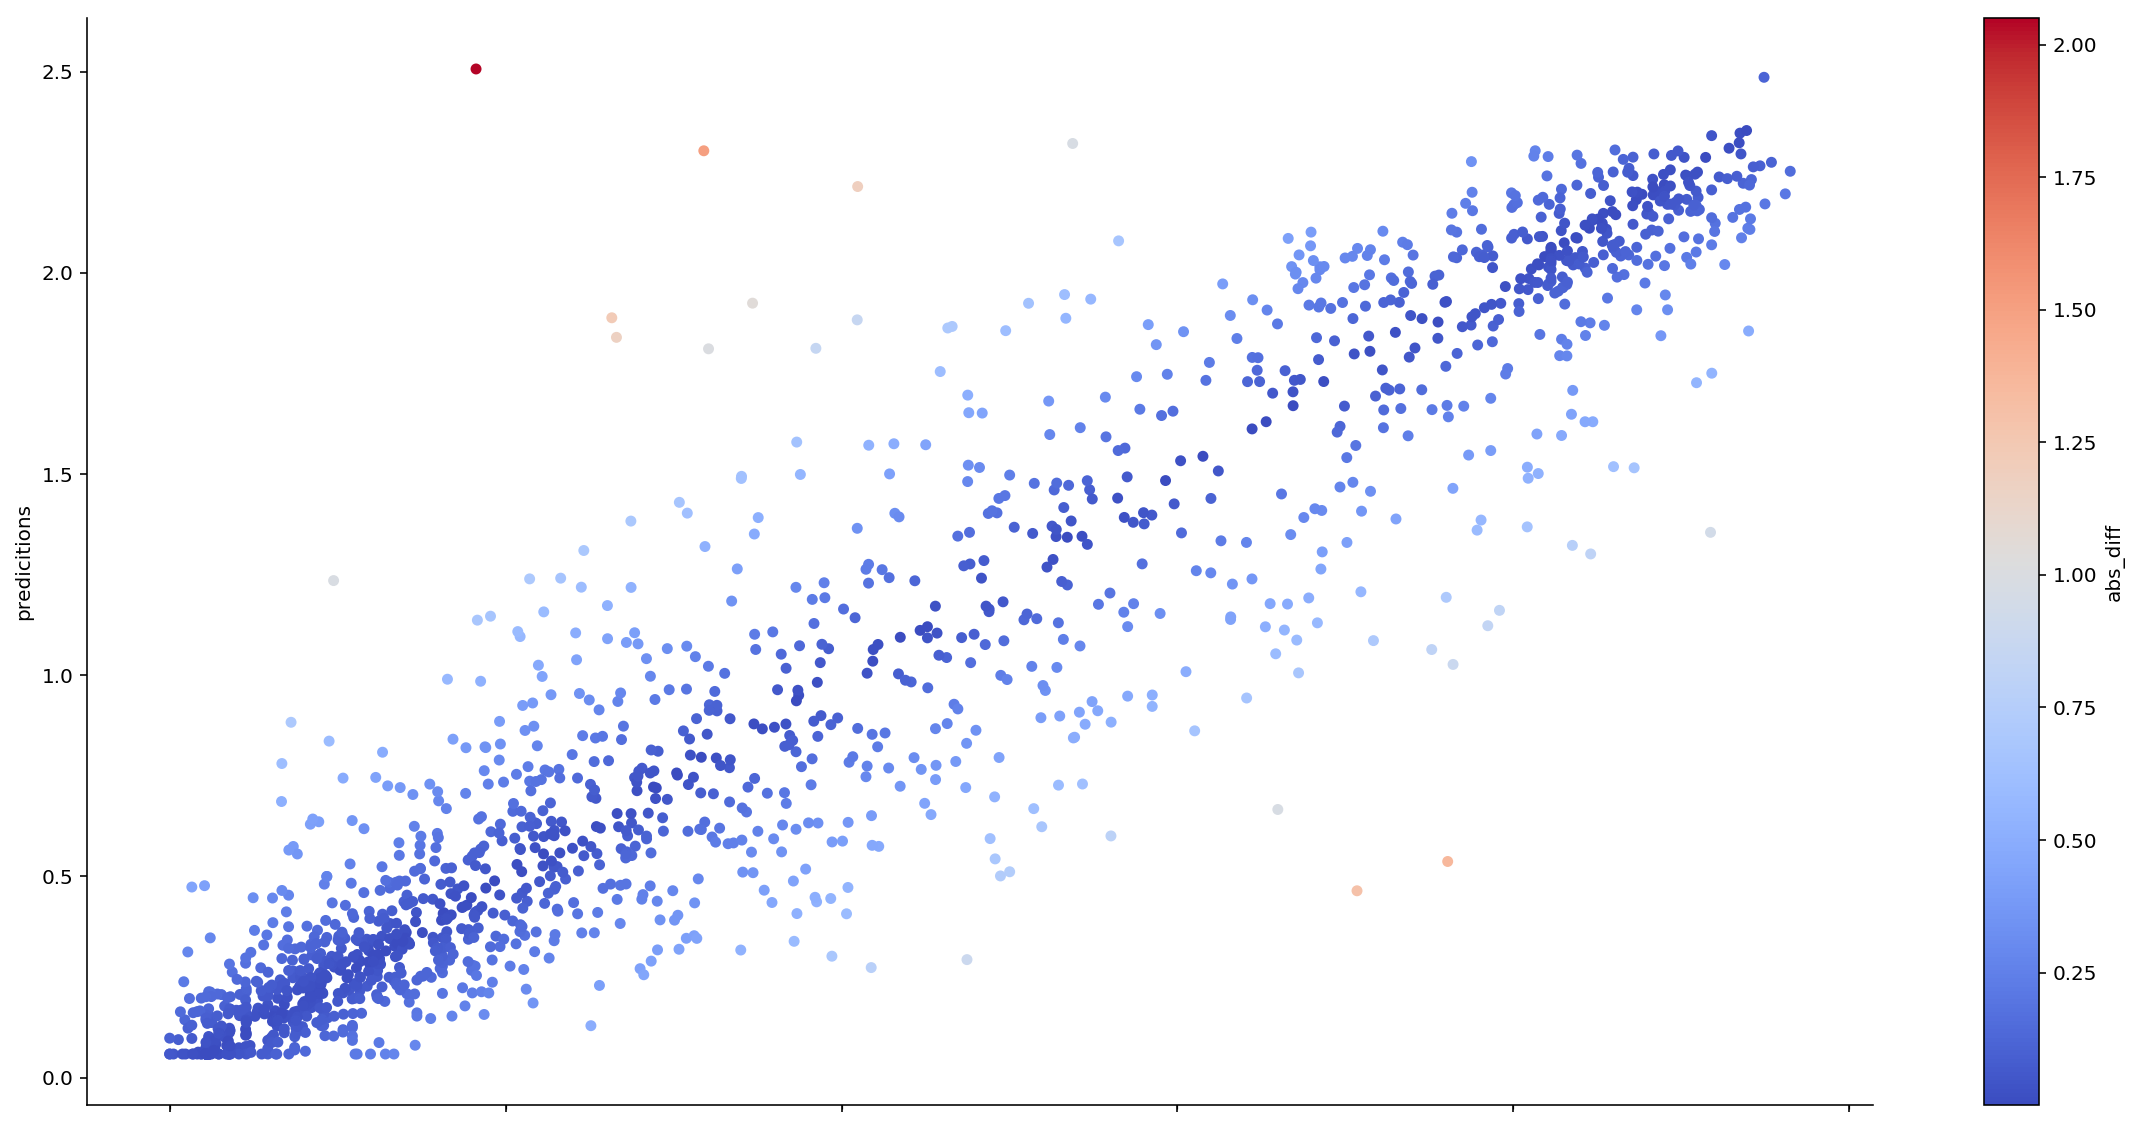

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

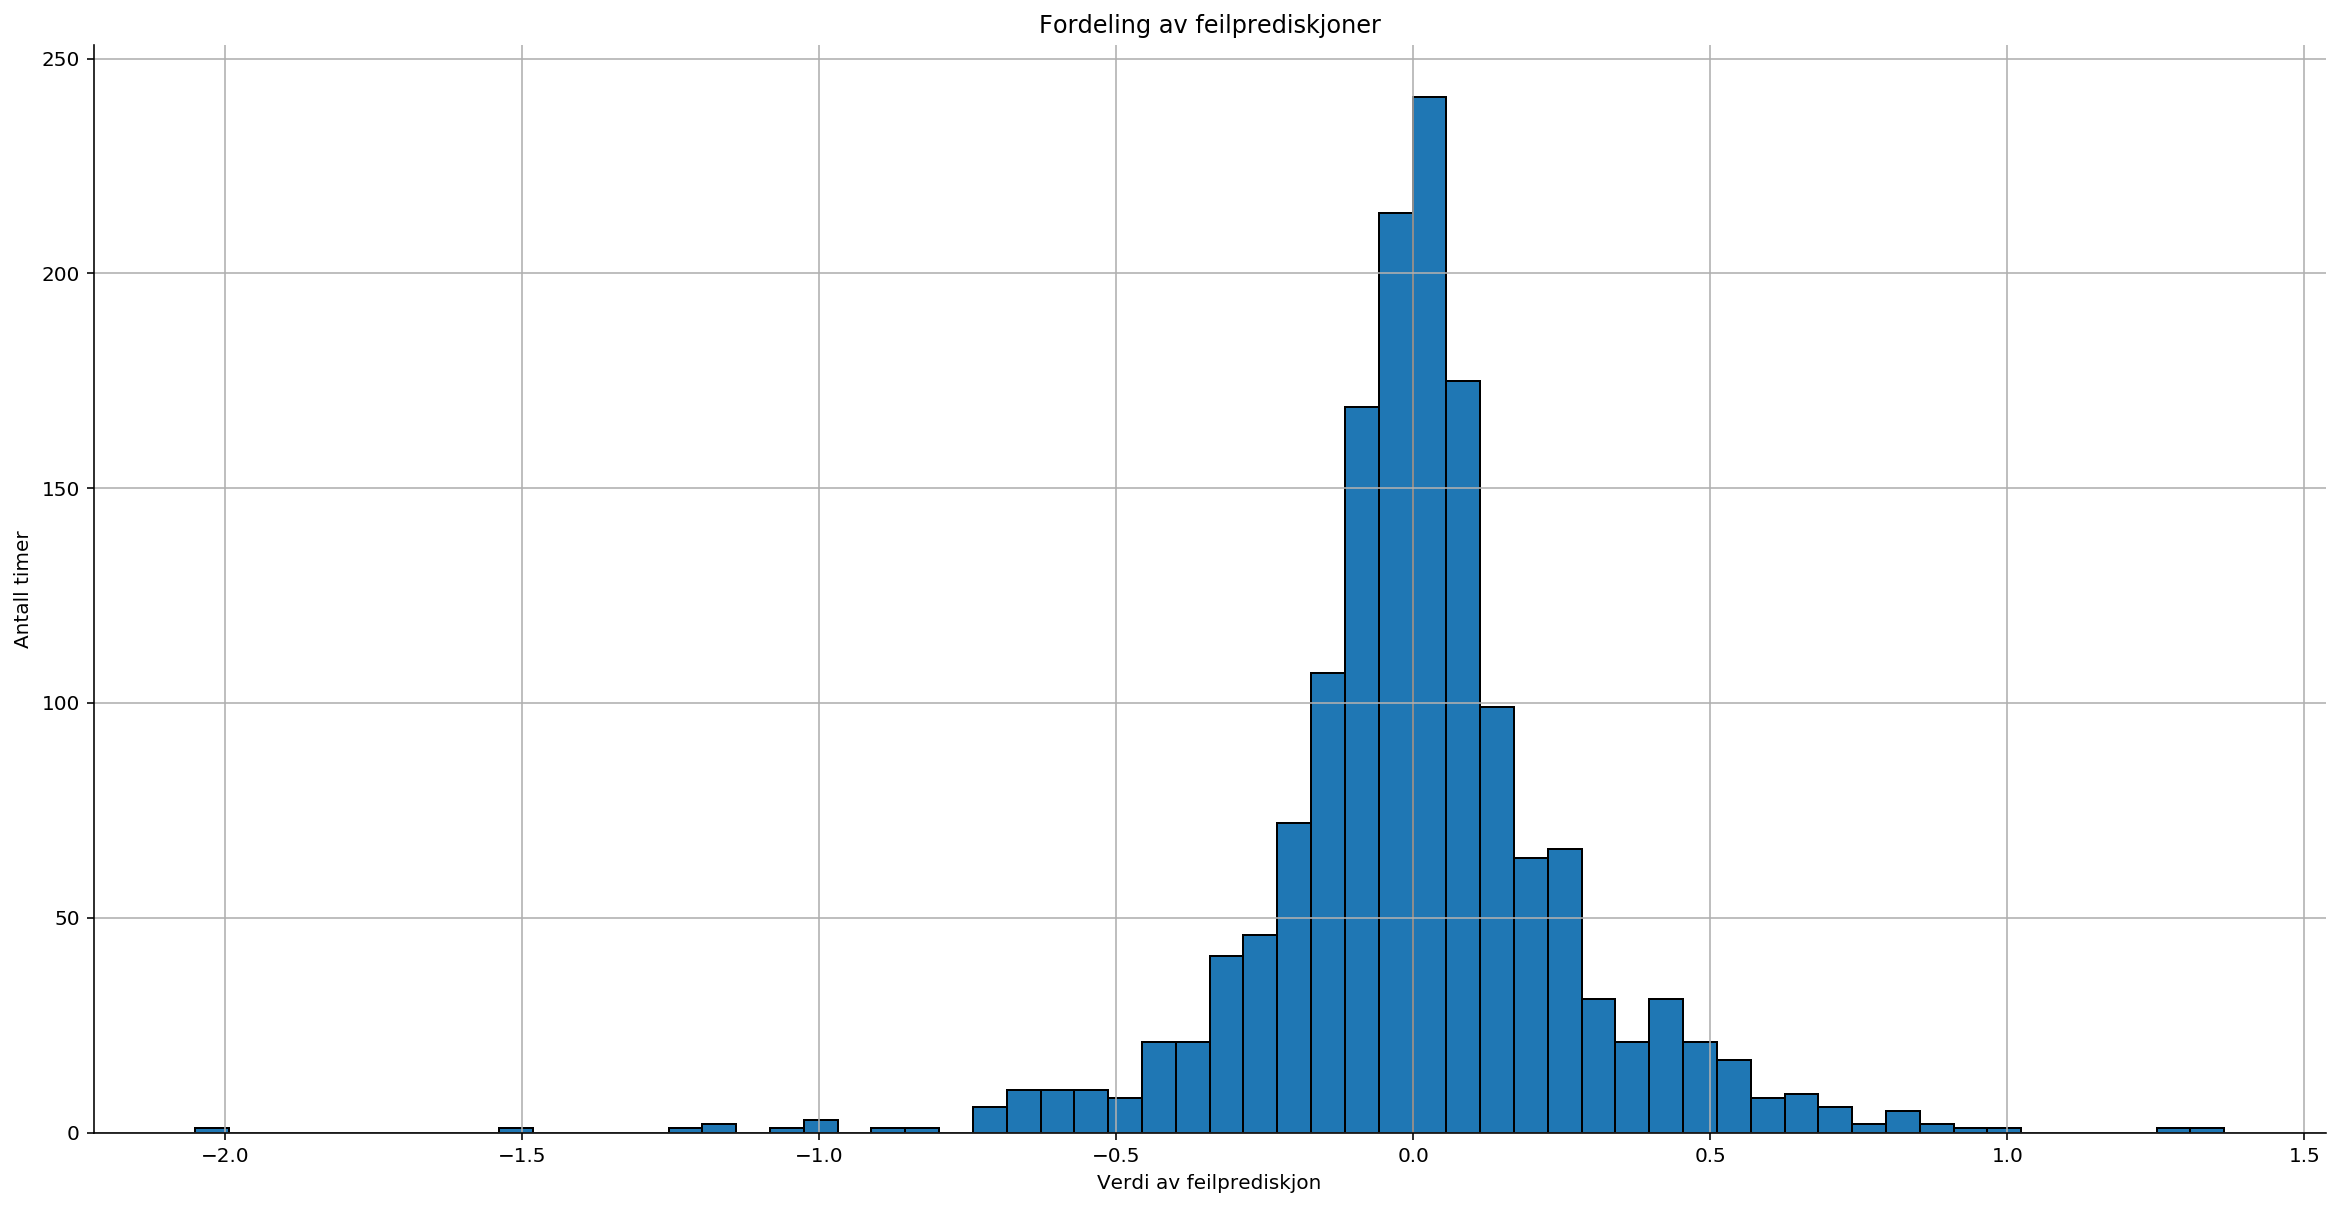

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

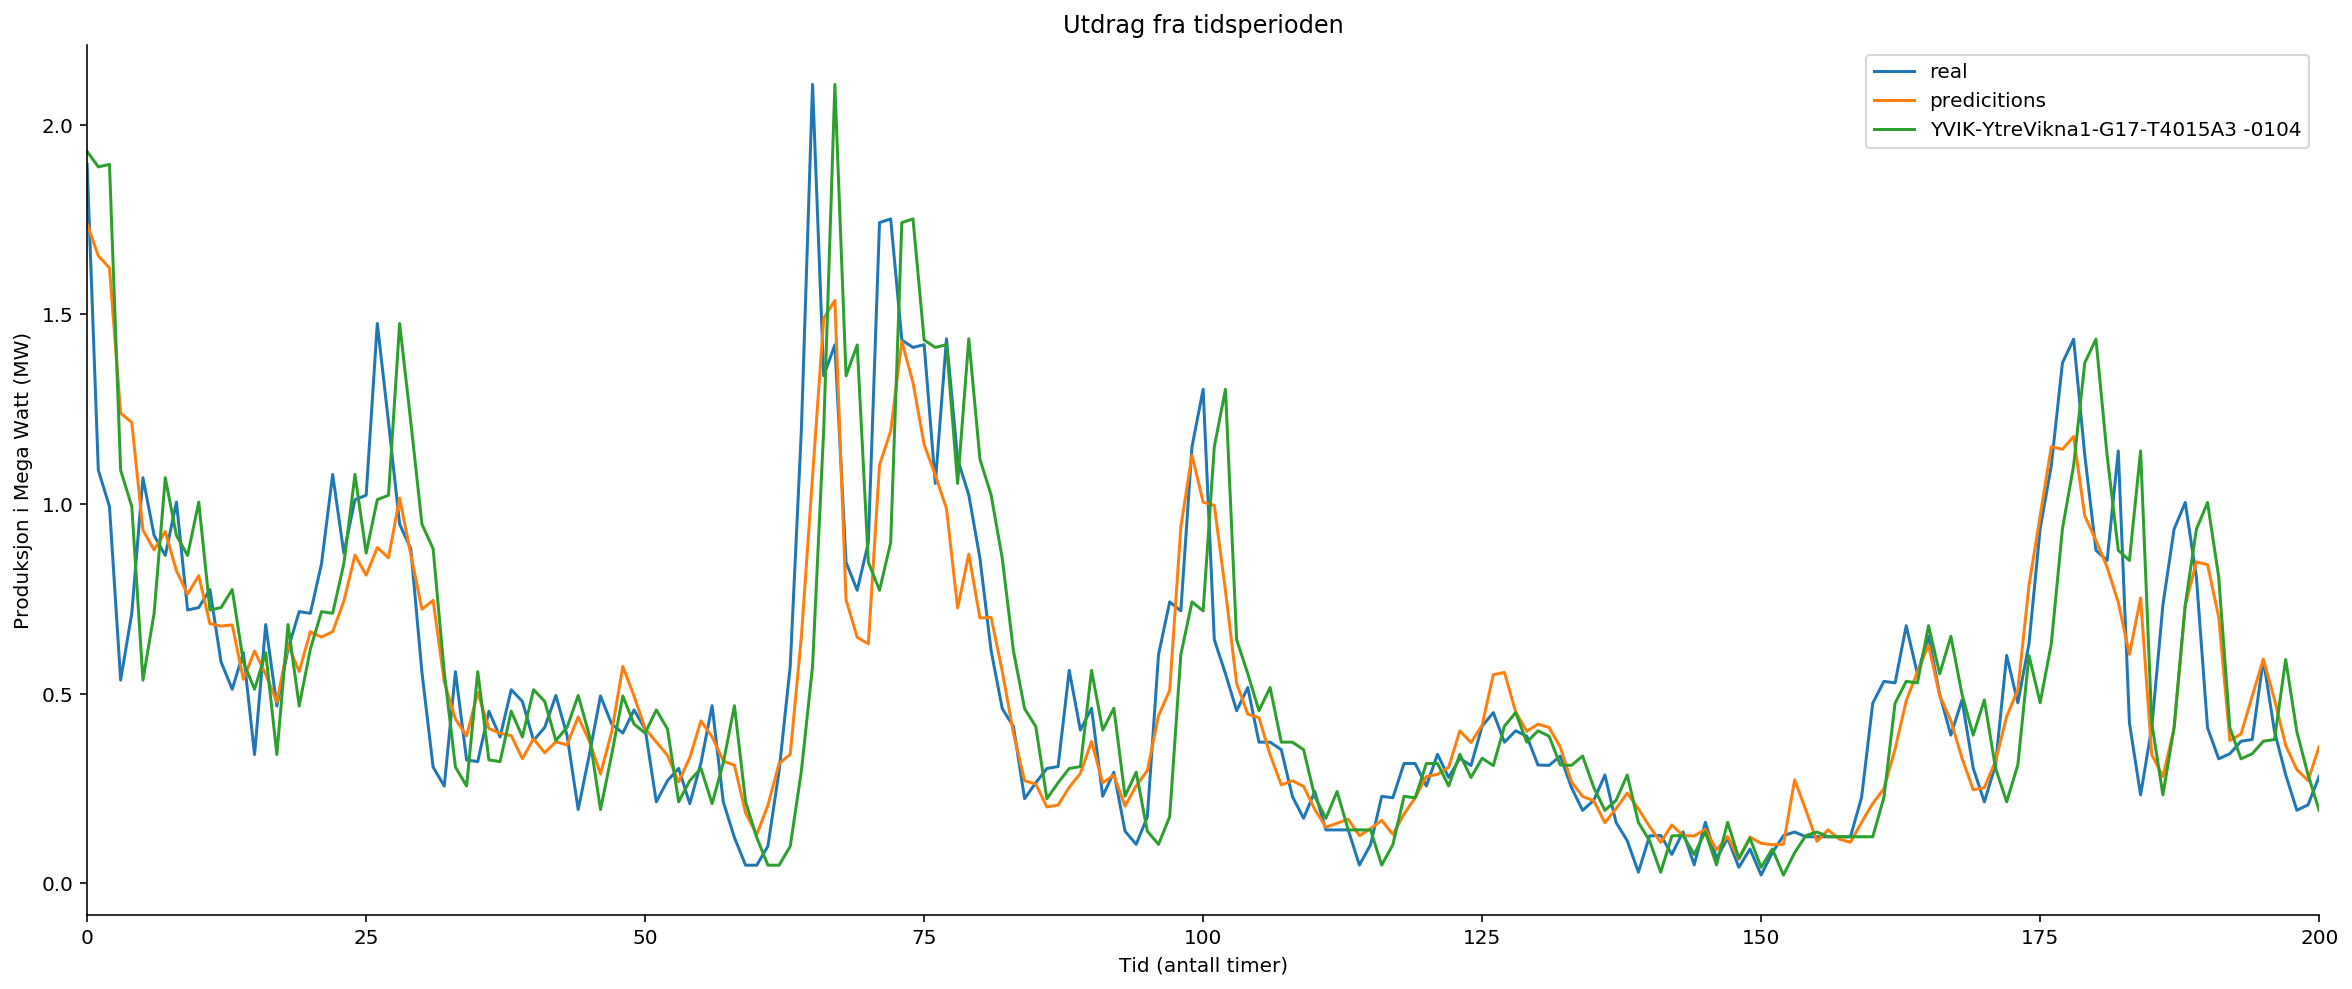

In [34]:
# Justere tidslinjen på plottet
start = 0
slutt = 200

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-G17-T4015A3 -0104'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')